# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Marketing Outcome Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [6]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
19,student,single,secondary,no,55,no,no,telephone,6,oct,89,2,193,1,other,no
19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes


In [7]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,1
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,1
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes,1
19,student,single,secondary,no,329,no,no,cellular,30,apr,169,1,190,2,success,yes,1
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,1
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8930, 17)

In [12]:
# test data shape
bank_df_test.shape

(2232, 17)

In [13]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes


In [14]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
20,student,single,secondary,no,215,no,no,cellular,24,nov,325,1,95,5,success,yes
20,student,single,primary,no,0,no,no,cellular,1,feb,143,5,91,8,failure,no
21,student,single,unknown,no,1506,no,no,cellular,14,sep,340,1,-1,0,unknown,yes
21,entrepreneur,single,tertiary,no,2077,no,no,cellular,5,aug,323,1,-1,0,unknown,yes
21,student,single,secondary,no,224,no,no,cellular,30,apr,871,1,-1,0,unknown,yes
21,student,single,secondary,no,794,no,no,cellular,5,jun,191,1,-1,0,unknown,yes
21,technician,single,unknown,no,360,no,no,cellular,26,may,131,2,-1,0,unknown,yes
20,student,single,unknown,no,829,no,no,cellular,9,jul,253,2,-1,0,unknown,yes
20,student,single,secondary,no,153,no,no,unknown,21,jun,100,1,-1,0,unknown,yes
19,student,single,secondary,no,329,no,no,cellular,22,oct,252,2,-1,0,unknown,yes


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluding svm and knn from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 300 sec
# Using max_models 7
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm', 'knn'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     max_models=7, 
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
pdays,BIGINT,8930,0,None,0,2280,6650,0.0,100.0
marital,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
balance,BIGINT,8930,0,None,612,7751,567,0.0,100.0
contact,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0
previous,BIGINT,8930,0,None,6650,2280,0,0.0,100.0
housing,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
age,BIGINT,8930,0,None,0,8930,0,0.0,100.0
month_of_year,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
poutcome,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0


            age    balance  day_of_month  duration  campaign     pdays  previous
func                                                                            
50%      39.000    543.000        15.000   253.000     2.000    -1.000     0.000
count  8930.000   8930.000      8930.000  8930.000  8930.000  8930.000  8930.000
mean     41.258   1526.813        15.694   370.698     2.521    51.977     0.835
min      18.000  -6847.000         1.000     3.000     1.000    -1.000     0.000
max      95.000  81204.000        31.000  3881.000    63.000   854.000    58.000
75%      49.000   1729.750        22.000   489.000     3.000    37.250     1.000
25%      32.000    120.000         8.000   138.000     1.000    -1.000     0.000
std      11.972   3258.624         8.402   348.196     2.742   109.688     2.284

Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
min,18,-6847,1,3,1,-1,0
std,11.972,3258.624,8.402,348.196,2.742,109.688,2.284
25%,32,120,8,138,1,-1,0
50%,39,543,15,253,2,-1,0
75%,49,1729.75,22,489,3,37.25,1
max,95,81204,31,3881,63,854,58
mean,41.258,1526.813,15.694,370.698,2.521,51.977,0.835
count,8930,8930,8930,8930,8930,8930,8930



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


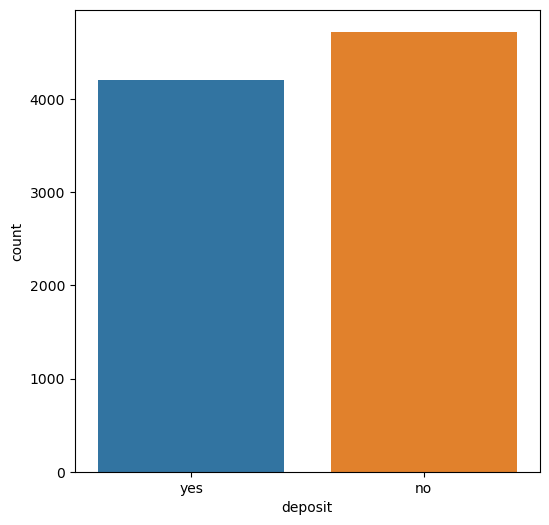

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   previous          11.321389
1   duration           6.091825
2        age           1.612542
3   campaign           5.464726
4      pdays          19.798432
5    balance           9.204927


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['contact', 'default_value', 'month_of_year', 'education', 'loan', 'housing', 'marital', 'job', 'poutcome']


age,contact_0,contact_1,contact_2,previous,default_value_0,default_value_1,duration,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,pdays,education_0,education_1,education_2,education_3,loan_0,loan_1,day_of_month,housing_0,housing_1,campaign,id,marital_0,marital_1,marital_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,balance,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
76,0,1,0,0,1,0,120,0,0,0,0,0,0,0,0,0,0,1,0,-1,1,0,0,0,1,0,13,1,0,1,96,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,163,0,0,0,1,0
76,0,1,0,3,1,0,233,0,0,0,0,0,0,0,0,0,0,1,0,187,1,0,0,0,1,0,19,1,0,2,128,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1411,0,0,1,0,1
76,0,1,0,0,1,0,263,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,1,0,23,1,0,4,48,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,820,0,0,0,1,1
76,1,0,0,1,1,0,227,0,1,0,0,0,0,0,0,0,0,0,0,192,1,0,0,0,1,0,13,1,0,2,72,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3324,1,0,0,0,1
76,1,0,0,0,1,0,231,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,28,1,0,1,16,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,8919,0,0,0,1,0
76,1,0,0,0,1,0,107,0,0,0,0,0,0,0,0,0,0,1,0,-1,1,0,0,0,1,0,21,1,0,2,80,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2693,0,0,0,1,1
76,1,0,0,0,1,0,170,0,0,0,0,0,0,0,1,0,0,0,0,-1,1,0,0,0,1,0,24,1,0,3,120,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3049,0,0,0,1,1
76,0,1,0,2,1,0,110,0,0,0,1,0,0,0,0,0,0,0,0,87,0,1,0,0,1,0,5,1,0,1,88,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2302,1,0,0,0,0
76,0,1,0,0,1,0,429,0,0,0,1,0,0,0,0,0,0,0,0,-1,1,0,0,0,1,0,4,1,0,1,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2223,0,0,0,1,1
76,1,0,0,3,1,0,122,0,0,0,0,0,0,0,0,0,1,0,0,92,1,0,0,0,1,0,13,1,0,1,64,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3324,0,0,1,0,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   campaign           5.464726
1        age           1.612542
2         id           0.761478
3    balance           9.204927
4      pdays          19.798432
5   duration           6.091825
6   previous          11.321389


['id', 'age', 'duration', 'campaign']


age,contact_0,contact_1,contact_2,previous,default_value_0,default_value_1,duration,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,pdays,education_0,education_1,education_2,education_3,loan_0,loan_1,day_of_month,housing_0,housing_1,campaign,id,marital_0,marital_1,marital_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,balance,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
26,1,0,0,2,1,0,247,0,0,0,0,0,0,1,0,0,0,0,0,63,0,0,1,0,1,0,28,1,0,1,664,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,222,0,0,1,0,1
26,1,0,0,0,1,0,998,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,1,0,0,1,0,10,0,1,4,432,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,-29,0,0,0,1,1
26,0,0,1,0,1,0,164,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,1,0,0,1,0,23,0,1,3,280,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-211,0,0,0,1,0
26,1,0,0,0,1,0,119,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,0,1,0,1,0,13,1,0,1,752,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,11862,0,0,0,1,1
26,0,1,0,0,1,0,82,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,1,0,0,1,0,7,0,1,1,1568,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,502,0,0,0,1,0
26,1,0,0,0,1,0,112,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0,1,0,1,0,27,0,1,2,1584,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,13107,0,0,0,1,0
26,1,0,0,0,1,0,268,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,1,0,0,1,0,29,1,0,1,1560,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,397,0,0,0,1,0
26,1,0,0,0,1,0,446,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,1,0,1,0,3,1,0,1,536,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2857,0,0,0,1,1
26,1,0,0,0,0,1,803,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,1,0,0,0,1,8,1,0,2,712,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,81,0,0,0,1,1
26,1,0,0,4,1,0,93,0,0,0,0,0,0,0,1,0,0,0,0,98,0,0,1,0,1,0,11,0,1,1,1488,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3730,0,1,0,0,0


['previous', 'pdays', 'balance']


age,contact_0,contact_1,contact_2,previous,default_value_0,default_value_1,duration,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,pdays,education_0,education_1,education_2,education_3,loan_0,loan_1,day_of_month,housing_0,housing_1,campaign,id,marital_0,marital_1,marital_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,balance,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
61,1,0,0,1,1,0,139,0,1,0,0,0,0,0,0,0,0,0,0,190,0,0,1,0,1,0,11,0,1,3,102,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2557,0,0,1,0,1
61,1,0,0,0,1,0,136,0,0,0,0,0,0,0,0,0,0,1,0,-1,0,0,1,0,1,0,16,1,0,2,118,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
61,1,0,0,0,1,0,226,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,0,1,0,1,0,11,1,0,3,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,537,0,0,0,1,1
61,1,0,0,0,1,0,381,0,0,0,0,0,0,0,0,0,1,0,0,-1,0,1,0,0,1,0,13,1,0,1,38,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3114,0,0,0,1,1
61,1,0,0,1,1,0,192,0,0,0,0,0,0,0,0,0,0,1,0,184,0,0,1,0,1,0,21,1,0,3,214,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,267,0,0,1,0,1
61,1,0,0,0,1,0,299,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,1,0,28,1,0,2,54,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3371,0,0,0,1,1
61,1,0,0,0,1,0,455,0,1,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,1,0,6,1,0,4,326,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,77,0,0,0,1,1
61,1,0,0,0,1,0,158,0,0,0,1,0,0,0,0,0,0,0,0,92,0,0,1,0,1,0,10,0,1,2,198,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2557,0,0,1,0,1
61,1,0,0,0,1,0,212,0,0,0,0,0,0,0,1,0,0,0,0,-1,0,1,0,0,1,0,12,1,0,1,206,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,537,0,0,0,1,1
61,1,0,0,1,1,0,975,0,1,0,0,0,0,0,0,0,0,0,0,98,0,0,1,0,0,1,6,0,1,4,246,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3140,0,0,0,1,1


['month_of_year_8', 'marital_0', 'job_1', 'month_of_year_6', 'poutcome_2', 'duration', 'job_6', 'loan_1', 'job_11', 'month_of_year_9', 'contact_2', 'education_0', 'job_8', 'job_2', 'loan_0', 'day_of_month', 'month_of_year_3', 'poutcome_3', 'month_of_year_5', 'marital_2', 'balance', 'default_value_0', 'contact_0', 'poutcome_1', 'housing_1', 'previous', 'housing_0', 'month_of_year_7', 'month_of_year_10', 'job_3', 'education_1', 'job_4', 'month_of_year_11', 'marital_1', 'pdays', 'job_5', 'month_of_year_0', 'poutcome_0', 'education_3', 'job_10', 'education_2', 'month_of_year_4', 'job_7', 'job_0', 'campaign', 'default_value_1', 'month_of_year_2', 'job_9', 'contact_1', 'month_of_year_1']


['duration', 'day_of_month', 'balance', 'previous', 'pdays', 'campaign']


month_of_year_8,marital_0,job_1,month_of_year_6,poutcome_2,job_6,loan_1,job_11,month_of_year_9,contact_2,education_0,job_8,job_2,loan_0,month_of_year_3,poutcome_3,month_of_year_5,marital_2,default_value_0,contact_0,poutcome_1,housing_1,deposit,housing_0,month_of_year_7,month_of_year_10,job_3,education_1,job_4,month_of_year_11,marital_1,job_5,month_of_year_0,poutcome_0,education_3,job_10,education_2,month_of_year_4,job_7,job_0,default_value_1,id,month_of_year_2,job_9,contact_1,month_of_year_1,duration,day_of_month,balance,previous,pdays,campaign
0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0.09980237154150198,0.3,0.3495208705538412,0.0,0.0,0.2
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,17,0,0,0,0,0.775691699604743,0.43333333333333335,0.3565047912944616,0.0,0.0,0.2
1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,18,0,0,0,0,0.9061264822134387,0.4666666666666667,0.3313301932759461,0.0,0.0,0.2
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19,0,0,0,1,0.24703557312252963,0.43333333333333335,0.34253694981322075,0.0,0.0,0.0
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,22,0,0,0,0,0.4189723320158103,0.9666666666666667,0.4833522819554978,0.0,0.0,0.4
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,25,0,0,0,1,0.25592885375494073,0.2,0.33279194412863405,1.0,0.4608294930875576,0.0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,5769,0,0,0,0,0.09782608695652174,0.03333333333333333,0.3428617833360403,0.5,0.0,0.0
0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5770,0,1,0,0,0.36264822134387353,0.6333333333333333,0.8310865681338314,0.5,0.9032258064516129,0.2
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,5771,0,0,0,0,0.16798418972332016,0.26666666666666666,0.33279194412863405,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,5772,0,0,0,0,0.2865612648221344,0.7,0.4023063180120188,0.0,0.0,0.2


['contact_0', 'contact_1', 'contact_2', 'previous', 'default_value_0', 'default_value_1', 'duration', 'month_of_year_0', 'month_of_year_1', 'month_of_year_2', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'pdays', 'education_0', 'education_1', 'education_2', 'education_3', 'loan_0', 'loan_1', 'day_of_month', 'housing_0', 'housing_1', 'campaign', 'marital_0', 'marital_1', 'marital_2', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'balance', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


['r_previous', 'r_duration', 'r_pdays', 'r_day_of_month', 'r_campaign', 'r_balance']


r_contact_1,r_month_of_year_8,r_loan_0,r_education_1,r_job_0,r_job_10,r_month_of_year_1,r_month_of_year_10,r_job_3,r_month_of_year_0,r_poutcome_3,r_marital_0,r_default_value_1,r_month_of_year_7,r_month_of_year_2,r_poutcome_0,r_marital_2,r_education_0,r_month_of_year_6,r_job_4,r_job_2,r_poutcome_2,r_month_of_year_3,r_job_9,r_month_of_year_9,r_default_value_0,r_poutcome_1,deposit,r_month_of_year_4,r_housing_1,r_housing_0,r_contact_0,r_month_of_year_5,r_marital_1,r_education_2,r_contact_2,r_job_6,r_job_1,r_job_8,id,r_loan_1,r_job_7,r_education_3,r_month_of_year_11,r_job_5,r_previous,r_duration,r_pdays,r_day_of_month,r_campaign,r_balance
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,11,0,0,0,0,0,0.0,0.09980237154150198,0.0,0.3,0.2,0.3495208705538412
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,17,0,0,0,0,0,0.0,0.775691699604743,0.0,0.43333333333333335,0.2,0.3565047912944616
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,18,0,1,0,0,0,0.0,0.9061264822134387,0.0,0.4666666666666667,0.2,0.3313301932759461
0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,19,0,0,1,0,0,0.0,0.24703557312252963,0.0,0.43333333333333335,0.0,0.34253694981322075
0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,22,0,0,0,0,1,0.0,0.4189723320158103,0.0,0.9666666666666667,0.4,0.4833522819554978
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,25,0,0,0,0,0,1.0,0.25592885375494073,0.4608294930875576,0.2,0.0,0.33279194412863405
0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,5877,0,0,0,0,0,1.0,0.39822134387351776,0.42857142857142855,0.3,0.2,0.36543771317199936
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,5878,0,0,0,0,1,1.0,0.1600790513833992,0.0,0.8333333333333334,0.0,0.7735910345947702
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,5879,0,0,0,0,0,0.0,0.17687747035573123,0.0,0.7,0.2,0.3826538898814358
0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,5880,0,1,0,0,0,0.0,0.1541501976284585,0.0,0.2,0.2,0.6079259379567972


['age', 'previous', 'duration', 'pdays', 'day_of_month', 'campaign', 'balance']


month_of_year_8,marital_0,job_1,month_of_year_6,poutcome_2,job_6,loan_1,job_11,month_of_year_9,contact_2,education_0,job_8,job_2,loan_0,month_of_year_3,poutcome_3,month_of_year_5,marital_2,default_value_0,contact_0,poutcome_1,housing_1,deposit,housing_0,month_of_year_7,month_of_year_10,job_3,education_1,job_4,month_of_year_11,marital_1,job_5,month_of_year_0,poutcome_0,education_3,job_10,education_2,month_of_year_4,job_7,job_0,default_value_1,month_of_year_2,id,job_9,contact_1,month_of_year_1,age,previous,duration,pdays,day_of_month,campaign,balance
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,965,0,0,0,0.5535714285714286,0.0,0.9100790513833992,0.0,0.5666666666666667,0.0,0.5033295436089005
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,246,0,0,1,0.7678571428571429,0.5,0.9604743083003953,0.45622119815668205,0.16666666666666666,0.6,0.8427805749553354
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,206,0,0,0,0.7678571428571429,0.0,0.20652173913043478,0.0,0.36666666666666664,0.0,0.4200097450056846
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1863,0,0,0,0.25,0.0,0.0691699604743083,0.0,0.2,0.2,0.37696930323209354
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280,1,0,0,0.14285714285714285,0.0,0.1590909090909091,0.0,0.7333333333333333,0.4,0.298522007471171
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1584,0,0,0,0.14285714285714285,0.0,0.10770750988142293,0.0,0.8666666666666667,0.2,0.4200097450056846
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0.017857142857142856,0.0,0.19960474308300397,0.0,0.5,0.0,0.3818418060743869
0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,51,0,0,0,0.017857142857142856,1.0,0.16403162055335968,0.880184331797235,0.9666666666666667,0.0,0.3862270586324509
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,218,0,0,0,0.39285714285714285,0.0,0.20948616600790515,0.0,0.4666666666666667,0.0,0.4200097450056846
0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1098,0,0,0,0.39285714285714285,0.0,0.10770750988142293,0.0,0.16666666666666666,0.8,0.6499918791619295


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31']


response_column : deposit                                                                                                                             
name : glm
family : BINOMIAL
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400, 500)
batch_size : (10, 80, 100, 150)
Total number of models for glm : 1728
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.791344,0.791344,0.791344,0.791344,0.789316,0.789935,0.789598,0.791620,0.791344,0.791455
1,2,DECISIONFOREST_2,pca,0.785530,0.785530,0.785530,0.785530,0.783859,0.782233,0.782912,0.785178,0.785530,0.785222
2,3,DECISIONFOREST_1,rfe,0.768088,0.768088,0.768088,0.768088,0.767284,0.762667,0.764111,0.767762,0.768088,0.767079
3,4,GLM_2,pca,0.753230,0.753230,0.753230,0.753230,0.750916,0.751396,0.751136,0.753506,0.753230,0.753348
4,5,GLM_1,rfe,0.643411,0.643411,0.643411,0.643411,0.639259,0.635229,0.635645,0.641321,0.643411,0.640799
5,6,GLM_0,lasso,0.602713,0.602713,0.602713,0.602713,0.721886,0.562108,0.487890,0.708303,0.602713,0.511387
6,7,XGBOOST_1,rfe,0.451550,0.451550,0.451550,0.451550,0.225775,0.500000,0.311081,0.203898,0.451550,0.280938


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.791344,0.791344,0.791344,0.791344,0.789316,0.789935,0.789598,0.791620,0.791344,0.791455
1,2,DECISIONFOREST_2,pca,0.785530,0.785530,0.785530,0.785530,0.783859,0.782233,0.782912,0.785178,0.785530,0.785222
2,3,DECISIONFOREST_1,rfe,0.768088,0.768088,0.768088,0.768088,0.767284,0.762667,0.764111,0.767762,0.768088,0.767079
3,4,GLM_2,pca,0.753230,0.753230,0.753230,0.753230,0.750916,0.751396,0.751136,0.753506,0.753230,0.753348
4,5,GLM_1,rfe,0.643411,0.643411,0.643411,0.643411,0.639259,0.635229,0.635645,0.641321,0.643411,0.640799
5,6,GLM_0,lasso,0.602713,0.602713,0.602713,0.602713,0.721886,0.562108,0.487890,0.708303,0.602713,0.511387
6,7,XGBOOST_1,rfe,0.451550,0.451550,0.451550,0.451550,0.225775,0.500000,0.311081,0.203898,0.451550,0.280938


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_0,lasso,0.791344,0.791344,0.791344,0.791344,0.789316,0.789935,0.789598,0.79162,0.791344,0.791455


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=2)

{'response_column': 'deposit',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.3,
 'max_depth': 4,
 'min_node_size': 2,
 'num_trees': 40,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

In [20]:
aml.model_hyperparameters(rank=6)

{'response_column': 'deposit',
 'name': 'glm',
 'family': 'BINOMIAL',
 'lambda1': 0.1,
 'alpha': 0.15,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.1,
 'momentum': 0.65,
 'iter_num_no_change': 5,
 'iter_max': 500,
 'batch_size': 80,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


age,contact,previous,default_value,duration,month_of_year,pdays,education,loan,day_of_month,housing,campaign,id,marital,job,balance,poutcome,deposit
40,unknown,0,no,253,jun,-1,secondary,no,20,no,2,50,married,admin.,-283,unknown,0
80,cellular,0,no,71,aug,-1,secondary,no,12,no,1,20,married,retired,1610,unknown,0
80,cellular,3,no,151,jan,91,primary,no,28,no,1,12,married,retired,997,success,1
76,telephone,0,no,170,apr,-1,primary,no,15,no,3,16,divorced,housemaid,1411,unknown,1
19,cellular,0,no,252,oct,-1,secondary,no,22,no,2,11,single,student,329,unknown,1
59,cellular,0,no,862,aug,-1,tertiary,no,11,no,11,227,married,retired,1296,unknown,0
34,cellular,2,no,492,may,175,tertiary,no,14,yes,1,25,married,management,273,failure,1
34,cellular,0,no,235,jun,-1,tertiary,no,18,no,3,161,married,management,443,unknown,1
78,cellular,0,no,325,apr,-1,primary,no,20,no,1,15,married,retired,240,unknown,1
32,cellular,5,no,492,sep,102,primary,no,7,no,3,199,married,blue-collar,1644,other,1


age,contact_0,contact_1,contact_2,previous,default_value_0,default_value_1,duration,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,pdays,education_0,education_1,education_2,education_3,loan_0,loan_1,day_of_month,housing_0,housing_1,campaign,id,marital_0,marital_1,marital_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,balance,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
76,0,1,0,0,1,0,383,0,0,0,0,0,0,0,0,0,1,0,0,-1,1,0,0,0,1,0,3,1,0,1,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1492,0,0,0,1,1
76,1,0,0,4,1,0,309,0,0,0,1,0,0,0,0,0,0,0,0,90,1,0,0,0,1,0,11,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3324,0,0,1,0,1
26,1,0,0,0,1,0,667,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,1,0,0,1,0,14,0,1,1,72,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1006,0,0,0,1,1
26,1,0,0,0,1,0,890,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,1,0,18,1,0,5,328,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1646,0,0,0,1,1
26,0,0,1,0,1,0,35,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0,1,0,1,0,19,1,0,3,224,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,775,0,0,0,1,0
26,0,0,1,0,1,0,436,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,1,0,0,1,0,27,0,1,1,392,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,218,0,0,0,1,0
26,1,0,0,0,1,0,188,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0,1,0,1,0,5,1,0,2,56,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,401,0,0,0,1,1
76,0,1,0,0,1,0,170,1,0,0,0,0,0,0,0,0,0,0,0,-1,1,0,0,0,1,0,15,1,0,3,16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1411,0,0,0,1,1
76,1,0,0,1,1,0,344,0,0,0,0,0,0,0,0,0,0,1,0,183,0,0,1,0,1,0,22,1,0,1,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2991,0,0,1,0,1
76,0,1,0,0,1,0,413,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,23,0,1,3,32,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1780,0,0,0,1,1


id,month_of_year_8,marital_0,job_1,month_of_year_6,poutcome_2,duration,job_6,loan_1,job_11,month_of_year_9,contact_2,education_0,job_8,job_2,loan_0,day_of_month,month_of_year_3,poutcome_3,month_of_year_5,marital_2,balance,default_value_0,contact_0,poutcome_1,housing_1,previous,housing_0,month_of_year_7,month_of_year_10,job_3,education_1,job_4,month_of_year_11,marital_1,pdays,job_5,month_of_year_0,poutcome_0,education_3,job_10,education_2,month_of_year_4,job_7,job_0,campaign,default_value_1,month_of_year_2,job_9,contact_1,month_of_year_1,deposit
24,0,0,0,0,0,383,0,0,0,1,0,1,0,0,1,3,0,1,0,0,1492,1,0,0,0,0,1,0,0,0,0,0,0,1,-1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
40,0,0,0,0,1,309,0,0,0,0,0,1,0,0,1,11,1,0,0,0,3324,1,1,0,0,4,1,0,0,0,0,0,0,1,90,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
72,1,0,1,0,0,667,0,0,0,0,0,0,0,0,1,14,0,1,0,1,1006,1,1,0,1,0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
328,0,0,0,0,0,890,0,0,0,0,0,0,0,0,1,18,0,1,0,1,1646,1,1,0,0,0,1,0,0,0,0,1,1,0,-1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1
224,1,0,0,0,0,35,0,0,0,0,1,0,0,0,1,19,0,1,0,0,775,1,0,0,0,0,1,0,0,0,0,1,0,1,-1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0
392,1,0,0,0,0,436,0,0,0,0,1,0,0,0,1,27,0,1,0,1,218,1,0,0,1,0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
56,1,0,0,0,0,188,0,0,0,0,0,0,0,0,1,5,0,1,0,1,401,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1
16,0,1,0,0,0,170,0,0,0,0,0,1,0,0,1,15,0,1,0,0,1411,1,0,0,0,0,1,0,0,1,0,0,0,0,-1,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,1
8,0,0,0,0,1,344,0,0,0,0,0,0,0,0,1,22,0,0,0,0,2991,1,1,0,0,1,1,0,1,0,0,0,0,1,183,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
32,0,0,0,0,0,413,0,0,0,0,0,0,0,0,1,23,0,1,0,0,1780,1,0,0,1,0,0,0,0,0,0,1,0,1,-1,0,1,0,1,0,0,0,0,0,3,0,0,0,1,0,1


month_of_year_8,marital_0,job_1,month_of_year_6,poutcome_2,job_6,loan_1,job_11,month_of_year_9,contact_2,education_0,job_8,job_2,loan_0,month_of_year_3,poutcome_3,month_of_year_5,marital_2,default_value_0,contact_0,poutcome_1,housing_1,deposit,housing_0,month_of_year_7,month_of_year_10,job_3,education_1,job_4,month_of_year_11,marital_1,job_5,month_of_year_0,poutcome_0,education_3,job_10,education_2,month_of_year_4,job_7,job_0,default_value_1,id,month_of_year_2,job_9,contact_1,month_of_year_1,duration,day_of_month,balance,previous,pdays,campaign
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,32,0,0,1,0,0.4051383399209486,0.7333333333333333,0.621893779438038,0.0,0.0,0.4
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,378,0,1,0,0,0.38438735177865613,0.1,0.6001299334091278,1.5,0.423963133640553,0.2
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,282,0,0,1,0,0.11363636363636363,0.2,0.33750203020951763,0.0,0.0,0.2
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0.24604743083003952,0.7,0.3862270586324509,0.0,0.0,0.2
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,141,0,0,0,0,0.34189723320158105,0.4666666666666667,0.8702290076335878,0.0,0.0,0.2
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,77,0,0,0,1,0.058300395256917,0.8666666666666667,0.37761897027773267,0.0,0.0,0.8
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,15,0,0,0,0,0.3181818181818182,0.6333333333333333,0.37177196686698066,0.0,0.0,0.0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0.5227272727272727,0.4666666666666667,0.35455579015754424,0.0,0.0,0.4
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,78,0,0,1,1,0.2737154150197628,0.5666666666666667,0.33279194412863405,0.0,0.0,2.4
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,86,0,0,0,0,0.3695652173913043,0.9333333333333333,0.4102647393210979,0.5,2.4009216589861753,0.0


id,contact_0,contact_1,contact_2,previous,default_value_0,default_value_1,duration,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,pdays,education_0,education_1,education_2,education_3,loan_0,loan_1,day_of_month,housing_0,housing_1,campaign,marital_0,marital_1,marital_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,balance,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
70,1,0,0,0,1,0,670,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,0,1,0,1,0,2,1,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,6016,0,0,0,1,1
102,1,0,0,3,1,0,232,0,0,0,0,0,0,0,0,0,0,0,1,92,0,1,0,0,1,0,29,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,11,0,0,1,0,1
94,1,0,0,0,1,0,342,0,0,0,0,0,0,0,0,0,1,0,0,-1,1,0,0,0,1,0,25,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3624,0,0,0,1,1
14,1,0,0,3,1,0,218,0,0,0,0,0,1,0,0,0,0,0,0,91,0,1,0,0,1,0,27,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1058,0,0,1,0,1
62,1,0,0,0,1,0,214,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,1,0,0,1,0,21,1,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1191,0,0,0,1,1
38,1,0,0,7,1,0,270,0,0,0,0,0,0,0,0,0,0,0,1,202,1,0,0,0,1,0,16,1,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2580,0,1,0,0,1
30,1,0,0,0,1,0,290,0,1,0,0,0,0,0,0,0,0,0,0,-1,0,0,1,0,1,0,10,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,52587,0,0,0,1,1
54,1,0,0,2,1,0,315,1,0,0,0,0,0,0,0,0,0,0,0,182,0,1,0,0,1,0,30,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4243,0,0,1,0,1
86,1,0,0,1,1,0,377,0,0,0,0,0,0,0,0,0,0,1,0,520,0,0,1,0,1,0,29,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,477,0,1,0,0,1
78,0,1,0,0,1,0,280,0,1,0,0,0,0,0,0,0,0,0,0,-1,1,0,0,0,0,1,18,0,1,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


r_contact_1,r_month_of_year_8,r_education_1,r_job_0,r_job_10,r_loan_0,r_month_of_year_1,r_month_of_year_10,r_job_3,r_month_of_year_0,r_poutcome_3,r_marital_0,r_default_value_1,r_month_of_year_7,r_month_of_year_2,r_poutcome_0,r_marital_2,r_education_0,r_month_of_year_6,r_job_4,r_job_2,r_poutcome_2,r_job_9,r_month_of_year_3,r_month_of_year_9,r_default_value_0,deposit,r_poutcome_1,r_housing_1,r_month_of_year_4,r_housing_0,r_contact_0,r_month_of_year_5,r_marital_1,r_education_2,r_contact_2,r_job_6,r_job_1,r_job_8,id,r_loan_1,r_job_7,r_education_3,r_month_of_year_11,r_job_5,r_previous,r_duration,r_pdays,r_day_of_month,r_campaign,r_balance
0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,141,0,0,0,0,0,0.0,0.34189723320158105,0.0,0.4666666666666667,0.2,0.8702290076335878
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,12,0,0,0,0,1,1.5,0.14624505928853754,0.423963133640553,0.9,0.0,0.4947214552541822
0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,20,0,0,0,0,1,0.0,0.06719367588932806,0.0,0.36666666666666664,0.0,0.5942829299983758
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,378,0,0,0,0,0,1.5,0.38438735177865613,0.423963133640553,0.1,0.2,0.6001299334091278
0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,11,0,0,0,0,0,0.0,0.24604743083003952,0.0,0.7,0.2,0.3862270586324509
0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,299,0,0,0,0,0,0.0,0.0958498023715415,0.0,0.6666666666666666,0.0,2.107195062530453
0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,15,0,0,0,0,1,0.0,0.3181818181818182,0.0,0.6333333333333333,0.0,0.37177196686698066
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,31,1,0,0,0,0,0.0,0.5227272727272727,0.0,0.4666666666666667,0.4,0.35455579015754424
1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,32,0,0,1,0,0,0.0,0.4051383399209486,0.0,0.7333333333333333,0.4,0.621893779438038
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,8,0,0,0,0,1,0.5,0.33695652173913043,0.847926267281106,0.7,0.0,0.8185804775052785


month_of_year_8,marital_0,job_1,month_of_year_6,poutcome_2,job_6,loan_1,job_11,month_of_year_9,contact_2,education_0,job_8,job_2,loan_0,month_of_year_3,poutcome_3,month_of_year_5,marital_2,default_value_0,contact_0,poutcome_1,housing_1,deposit,housing_0,month_of_year_7,month_of_year_10,job_3,education_1,job_4,month_of_year_11,marital_1,job_5,month_of_year_0,poutcome_0,education_3,job_10,education_2,month_of_year_4,job_7,job_0,default_value_1,month_of_year_2,id,job_9,contact_1,month_of_year_1,age,previous,duration,pdays,day_of_month,campaign,balance
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,0,0,0,1.0714285714285714,0.0,0.3181818181818182,0.0,0.6333333333333333,0.0,0.37177196686698066
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0.017857142857142856,0.0,0.24604743083003952,0.0,0.7,0.2,0.3862270586324509
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,299,1,0,0,0.7321428571428571,0.0,0.0958498023715415,0.0,0.6666666666666666,0.0,2.107195062530453
0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,12,0,0,0,1.1071428571428572,1.5,0.14624505928853754,0.423963133640553,0.9,0.0,0.4947214552541822
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,378,1,0,0,0.39285714285714285,1.5,0.38438735177865613,0.423963133640553,0.1,0.2,0.6001299334091278
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,282,0,1,0,0.39285714285714285,0.0,0.11363636363636363,0.0,0.2,0.2,0.33750203020951763
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,32,0,1,0,1.0357142857142858,0.0,0.4051383399209486,0.0,0.7333333333333333,0.4,0.621893779438038
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,8,0,0,0,1.0357142857142858,0.5,0.33695652173913043,0.847926267281106,0.7,0.0,0.8185804775052785
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,78,0,1,1,0.7678571428571429,0.0,0.2737154150197628,0.0,0.5666666666666667,2.4,0.33279194412863405
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,86,0,0,0,0.7678571428571429,0.5,0.3695652173913043,2.4009216589861753,0.9333333333333333,0.0,0.4102647393210979


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,deposit
0,32,0.453397,0.533044,-0.846074,0.209196,-0.042443,-0.316593,-0.002731,-0.496610,0.085945,...,0.969129,0.083231,0.201957,-0.245763,-0.003310,-0.137499,0.024122,0.315422,-0.107713,1
1,193,-0.492682,-0.563386,0.844843,-0.749992,-0.130170,-0.212702,0.145569,-0.101333,-0.298015,...,-0.081990,-0.159744,0.214003,0.638587,-0.145256,-0.220074,0.839255,0.365250,0.047915,1
2,378,-0.123816,1.041948,1.202133,0.929874,0.664547,0.041018,-0.134765,0.955151,0.408725,...,0.091873,0.019720,-0.135216,-0.026195,-0.993522,0.328181,-0.034364,0.034867,0.001024,1
3,11,-0.518892,-0.530198,0.924027,-0.782061,-0.108192,-0.216272,0.146327,-0.049038,-0.370369,...,0.244075,-0.247212,0.014360,0.488440,0.414187,0.885990,-0.209671,-0.538368,-0.095502,1
4,12,-0.914399,-0.678983,-0.459248,0.904446,1.070413,0.370969,0.648472,0.038978,0.453460,...,-0.114332,-0.431448,-0.167151,-0.023984,-1.180022,0.110673,0.065353,0.080839,0.451175,1
5,141,1.112275,-0.277564,-0.138876,0.418858,-0.195413,-0.465907,0.439603,0.100315,-0.519234,...,0.104627,-0.253598,0.065425,-0.023325,-0.013881,-0.032402,-0.035754,0.003082,-0.078983,0
6,78,0.717248,-0.026787,-1.078592,0.067416,-0.606062,0.838747,0.433959,0.332502,0.551246,...,0.379808,0.162695,-0.090913,-0.341697,-0.123922,0.301930,0.165500,-0.020404,0.072267,0
7,15,-0.537535,-0.562929,-0.888716,-0.091121,0.053871,-0.159103,0.900055,-0.010107,0.321166,...,-0.195645,0.103353,-0.316160,-0.262950,-0.072678,-0.091435,-0.076929,-0.005393,-0.079802,1
8,8,-1.241019,-0.145777,-0.489569,0.840470,0.845286,0.187417,-0.110514,0.034080,0.255326,...,-0.046696,-0.398745,-0.001706,-0.339665,0.139123,0.624784,-0.063174,-0.053777,-0.415309,1
9,201,-1.043826,0.435869,-0.857691,-0.043585,-0.212830,-0.222373,-0.201131,-0.117453,-0.361259,...,-0.049466,0.164233,0.078618,-0.058855,-0.087243,0.049979,-0.088169,-0.075409,0.024316,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Prediction : 
    id  prediction  prob_1  prob_0  deposit
0  378           1   0.725   0.275        1
1   11           1   0.600   0.400        1
2  299           0   0.350   0.650        1
3   32           1   0.600   0.400        1
4   15           1   0.650   0.350        1
5   31           1   0.550   0.450        1
6  193           1   0.675   0.325        1
7  201           1   0.550   0.450        1
8  141           0   0.375   0.625        0
9   77           0   0.050   0.950        0

ROC-AUC : 


AUC,GINI
0.879935304990758,0.759870609981516


threshold_value,tpr,fpr
0.04081632653061224,0.9981515711645101,0.9008695652173913
0.08163265306122448,0.9935304990757856,0.7434782608695653
0.1020408163265306,0.988909426987061,0.6878260869565217
0.12244897959183673,0.988909426987061,0.6878260869565217
0.16326530612244897,0.9842883548983364,0.5886956521739131
0.18367346938775508,0.9824399260628466,0.54
0.14285714285714285,0.9852125693160814,0.6356521739130435
0.061224489795918366,0.9972273567467652,0.82
0.02040816326530612,1.0,0.9669565217391304
0.0,1.0,1.0



Confusion Matrix : 


array([[913, 237],
       [177, 905]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,deposit
10,1,0.825,0.175,1
12,1,0.8,0.2,1
13,1,0.6,0.4,1
14,1,0.875,0.125,1
16,0,0.4,0.6,1
17,1,0.725,0.275,1
15,1,0.65,0.35,1
11,1,0.6,0.4,1
9,0,0.35,0.65,1
8,1,0.9,0.1,1


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bank_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1      913      177   0.837615  0.793913  0.815179     1150
1               1  CLASS_2      237      905   0.792469  0.836414  0.813849     1082
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.814516
1       5     Macro-Precision     0.815042
2       6        Macro-Recall     0.815164
3       7            Macro-F1     0.814514
4       9     Weighted-Recall     0.814516
5      10         Weighted-F1     0.814534
6       8  Weighted-Precision     0.815730
7

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
1,1,CLASS_2,237,905,0.7924693520140105,0.8364140480591498,0.8138489208633093,1082
0,0,CLASS_1,913,177,0.8376146788990826,0.7939130434782609,0.8151785714285714,1150


In [25]:
remove_context()

True